In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fullData = pd.read_csv('/Users/patocastillo/Desktop/ScientificWritingData.csv')





In [462]:
fullData.columns = ['faculty', 'fase','exTaken','exFailed','failSL','failCr','exPassed','passSL','passCr','stressLevel']

In [463]:
fullData= fullData.dropna()


In [464]:
fullData = fullData.drop(0)





In [465]:
fullData.describe()

,exTaken,exFailed,failSL,failCr,exPassed,passSL,passCr,stressLevel
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,7.047619,1.690476,0.976190,1.571429,5.571429,3.095238,2.809524,3.547619
std,1.305754,1.522003,1.334132,1.952395,1.875943,2.611509,2.086403,1.253335
min,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
25%,6.250000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,2.250000
50%,7.000000,1.000000,0.000000,1.000000,5.000000,2.500000,2.500000,4.000000
75%,8.000000,3.000000,1.000000,3.000000,7.000000,5.000000,4.000000,5.000000
max,9.000000,4.000000,4.000000,9.000000,9.000000,9.000000,7.000000,5.000000


# Exam overall plot 

Text(0, 0.5, 'number of exams (unit) ')

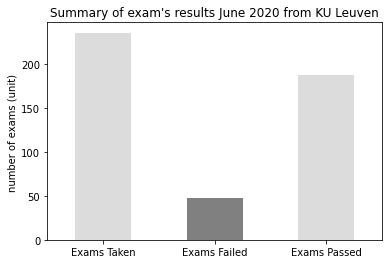

In [498]:
examsOverall = fullData.loc[fullData['exTaken'] == (fullData['exFailed'] +fullData['exPassed'])]

examsOverall = examsOverall[['exTaken','exFailed','exPassed']]

examsOverall.loc['Column_Total']= examsOverall.sum(numeric_only=True, axis=0)

boxPlotexamsOverall = examsOverall.loc['Column_Total']
boxPlotexamsOverall= boxPlotexamsOverall.rename(
   
     index={
        'exTaken': 'Exams Taken',
        'exFailed': 'Exams Failed',
        'exPassed': 'Exams Passed'
    })

ax = boxPlotexamsOverall.plot.bar( rot=0,color=['#DCDCDC', '#808080', '#DCDCDC'])
plt.title("Summary of exam's results June 2020 from KU Leuven")
plt.ylabel("number of exams (unit) ")

In [467]:
boxPlotexamsOverall

Exams Taken     236
Exams Failed     48
Exams Passed    188
Name: Column_Total, dtype: int64

In [468]:
fullData.head()

,faculty,fase,exTaken,exFailed,failSL,failCr,exPassed,passSL,passCr,stressLevel
1,Faculty of Engineering Science,1st-year bachelor,8,0,0,0,8,5,3,4
2,Faculty of Engineering Technology,1st-year bachelor,9,4,0,9,5,0,5,5
3,Faculty of Engineering Technology,1st-year bachelor,7,2,0,0,5,5,1,4
4,Faculty of Engineering Technology,1st-year bachelor,7,2,2,0,5,2,3,5
5,Faculty of Engineering Technology,1st-year bachelor,8,1,1,1,8,8,3,4


# Pie Chart for passing 

Text(0, 0.5, '')

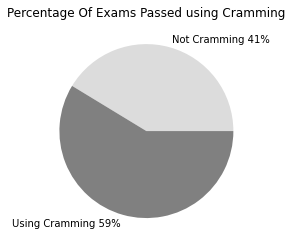

In [495]:
examsPass = fullData.loc[fullData['exPassed'] == (fullData['passSL'] +fullData['passCr'])]


examsPass = examsPass[['exPassed','passSL','passCr']]

examsPass.loc['Column_Total']= examsPass.sum(numeric_only=True, axis=0)

piePlotexamsOverall = examsPass.loc['Column_Total',['passSL','passCr']]

piePlotexamsOverall= piePlotexamsOverall.rename(
   
     index={
        'passSL': 'Not Cramming 41%',
        'passCr': 'Using Cramming 59%',

    })
ax = piePlotexamsOverall.plot.pie(colors = ['#DCDCDC','#808080'] )
plt.title("Percentage Of Exams Passed using Cramming")
plt.ylabel("")




In [470]:
piePlotexamsOverall

Not Cramming 41%      38
Using Cramming 59%    54
Name: Column_Total, dtype: int64

In [471]:
fullData.head()

,faculty,fase,exTaken,exFailed,failSL,failCr,exPassed,passSL,passCr,stressLevel
1,Faculty of Engineering Science,1st-year bachelor,8,0,0,0,8,5,3,4
2,Faculty of Engineering Technology,1st-year bachelor,9,4,0,9,5,0,5,5
3,Faculty of Engineering Technology,1st-year bachelor,7,2,0,0,5,5,1,4
4,Faculty of Engineering Technology,1st-year bachelor,7,2,2,0,5,2,3,5
5,Faculty of Engineering Technology,1st-year bachelor,8,1,1,1,8,8,3,4


# Pie Chart for failing  

Text(0, 0.5, '')

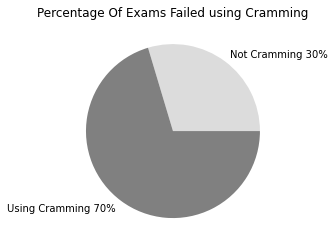

In [496]:
examsFail = fullData.loc[fullData['exFailed'] == (fullData['failSL'] +fullData['failCr'])]

examsFail = examsFail[['exFailed','failSL','failCr']]

examsFail.loc['Column_Total']= examsFail.sum(numeric_only=True, axis=0)

pieFaile = examsFail.loc['Column_Total',['failSL','failCr']]


pieFaile= pieFaile.rename(
   
     index={
        'failSL': 'Not Cramming 30%',
        'failCr': 'Using Cramming 70%',

    })
ax = pieFaile.plot.pie( colors = ['#DCDCDC','#808080'])
plt.title("Percentage Of Exams Failed using Cramming")
plt.ylabel("")

In [473]:
examsFail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1 to Column_Total
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   exFailed  27 non-null     int64
 1   failSL    27 non-null     int64
 2   failCr    27 non-null     int64
dtypes: int64(3)
memory usage: 2.1+ KB


# Stress Bar plot 

In [474]:
fullData.head()

,faculty,fase,exTaken,exFailed,failSL,failCr,exPassed,passSL,passCr,stressLevel
1,Faculty of Engineering Science,1st-year bachelor,8,0,0,0,8,5,3,4
2,Faculty of Engineering Technology,1st-year bachelor,9,4,0,9,5,0,5,5
3,Faculty of Engineering Technology,1st-year bachelor,7,2,0,0,5,5,1,4
4,Faculty of Engineering Technology,1st-year bachelor,7,2,2,0,5,2,3,5
5,Faculty of Engineering Technology,1st-year bachelor,8,1,1,1,8,8,3,4


In [475]:
 stress = fullData['stressLevel']

In [499]:
Stressplot = stress.value_counts()
Stressplot = Stressplot.sort_index(ascending=True, axis=0)

Stressplot.index = [
    '1-Low',
    '2-Mild',
    '3-Moderate',
    '4-High',
    '5-Extremely high'
   
]
Stressplot.()


count     5.000000
mean      8.400000
std       4.159327
min       2.000000
25%       7.000000
50%       9.000000
75%      12.000000
max      12.000000
Name: stressLevel, dtype: float64

Text(0, 0.5, 'Number of Students ')

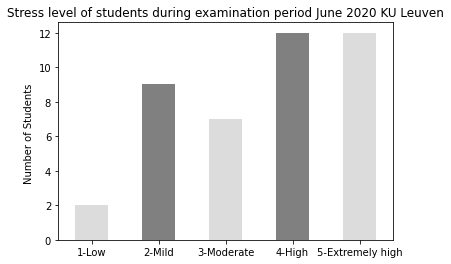

In [497]:

ax1 = Stressplot.plot.bar( rot=0,color=['#DCDCDC', '#808080', '#DCDCDC', '#808080', '#DCDCDC'])
plt.title("Stress level of students during examination period June 2020 KU Leuven")
plt.ylabel("Number of Students ")

# Stress vs craming plot 

Text(0.5, 0, 'Percentage Of Exams that a Student Passed By Cramming (%)')

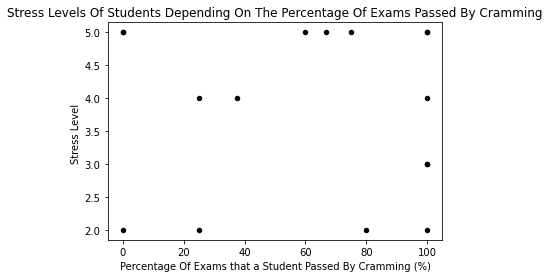

In [488]:
fullData ['Exams passed by cramming'] = (fullData ['passCr'] / fullData ['exPassed'])*100
StressCram = fullData.loc[fullData['exPassed'] == (fullData['passSL'] +fullData['passCr'])]
StressCram = StressCram[['stressLevel','Exams passed by cramming']]

ax1 = StressCram.plot.scatter(x='Exams passed by cramming',
                      y='stressLevel', color = ['black'])
plt.title("Stress Levels Of Students Depending On The Percentage Of Exams Passed By Cramming")
plt.ylabel("Stress Level ")
plt.xlabel("Percentage Of Exams that a Student Passed By Cramming (%)")


In [479]:
StressCram.describe()

,stressLevel,Exams passed by cramming
count,16.000000,16.000000
mean,3.812500,60.572917
std,1.276388,40.017032
min,2.000000,0.000000
25%,2.750000,25.000000
50%,4.000000,70.833333
75%,5.000000,100.000000
max,5.000000,100.000000


In [480]:
fullData

,faculty,fase,exTaken,exFailed,failSL,failCr,exPassed,passSL,passCr,stressLevel,Exams passed by cramming
1,Faculty of Engineering Science,1st-year bachelor,8,0,0,0,8,5,3,4,37.500000
2,Faculty of Engineering Technology,1st-year bachelor,9,4,0,9,5,0,5,5,100.000000
3,Faculty of Engineering Technology,1st-year bachelor,7,2,0,0,5,5,1,4,20.000000
4,Faculty of Engineering Technology,1st-year bachelor,7,2,2,0,5,2,3,5,60.000000
5,Faculty of Engineering Technology,1st-year bachelor,8,1,1,1,8,8,3,4,37.500000
6,Faculty of Engineering Technology,1st-year bachelor,7,0,0,0,7,7,2,3,28.571429
7,Faculty of Engineering Technology,1st-year bachelor,6,4,4,4,2,1,0,5,0.000000
8,Faculty of Engineering Technology,1st-year bachelor,9,4,4,3,3,1,4,5,133.333333
9,Faculty of Engineering Technology,1st-year bachelor,8,2,0,5,6,2,4,5,66.666667
10,Faculty of Engineering Technology,1st-year bachelor,8,2,1,0,6,0,6,3,100.000000


# Info for Alex 

In [481]:
AlexData1 = fullData.loc[fullData['exTaken'] == (fullData['exPassed'] +fullData['exFailed'])]
AlexData2 = AlexData1.loc[AlexData1['exFailed'] == (AlexData1['failSL'] +AlexData1['failCr'])]
AlexData3 = AlexData2.loc[AlexData2['exPassed'] == (AlexData2['passSL'] +AlexData2['passCr'])]
 



In [482]:


#fullData.to_excel("/Users/patocastillo/Desktop/output.xlsx")  

